In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from datetime import datetime, timedelta
import os

In [95]:
DB = sqlite3.connect('varledronai.db')
C = DB.cursor()
sql="""SELECT * FROM dronai;"""
dfv = pd.read_sql_query(sql, con=DB)
dfv['kaina']=dfv['kaina'].astype(float)

In [96]:
DB = sqlite3.connect('pigudronai.db')
C = DB.cursor()
sql="""SELECT * FROM dronai;"""
dfp = pd.read_sql_query(sql, con=DB)
dfp = dfp.dropna(subset=['kaina'])
dfp['kaina'] = dfp['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp['kaina']=dfp['kaina'].astype(float)

In [97]:
dfv1 = dfv[['kaina', 'gamintojas']]
dfv1['pardavejas'] = 'varle.lt'
dfp1 = dfp[['kaina', 'prekės ženklas:']]
dfp1['pardavejas'] = 'pigu.lt'
dfp1.rename(columns={'prekės ženklas:': 'gamintojas'}, inplace=True)

spalvukiek = dfv1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 3].index
dfv1 = dfv1[dfv1['gamintojas'].isin(spalvukiek)]

spalvukiek = dfp1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 3].index
dfp1 = dfp1[dfp1['gamintojas'].isin(spalvukiek)]

dfpv1= pd.concat([dfv1, dfp1], axis=0, ignore_index=True)

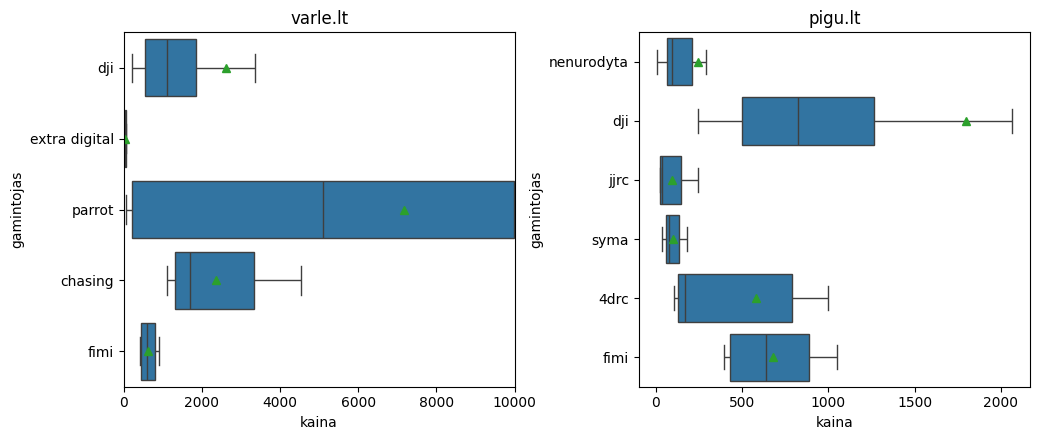

In [98]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10.5, 4.5))
sns.boxplot(data=dfv1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis1)
sns.boxplot(data=dfp1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('varle.lt')
axis2.set_title('pigu.lt')
fig.tight_layout()
axis1.set_xlim(0, 10000)
plt.show()

In [99]:
dfv2=dfv[['kaina', 'didžiausias skrydžio laikas']]
dfp2=dfp[['kaina', 'skraidymo laikas:']]
dfv2.rename(columns={'didžiausias skrydžio laikas': 'skraidymo laikas:'}, inplace=True)

dfpv2= pd.concat([dfv2, dfp2], axis=0, ignore_index=True)

dfpv2 = dfpv2.dropna(subset=['skraidymo laikas:'])
dfpv2['skraidymo laikas:'] = dfpv2['skraidymo laikas:'].str.replace(
    r'\b(minutes|min\.|minučių|minutė|)\b', '', regex=True
).str.strip()

dfpv2['skraidymo laikas:'] = (
    dfpv2['skraidymo laikas:']
    .str.strip()
    .str.replace(r'\s*min\*?', '', regex=True) 
)
dfpv2['skraidymo laikas:'] = dfpv2['skraidymo laikas:'].replace(['', '-', '.', '-.'], None)
dfpv2 = dfpv2.dropna(subset=['skraidymo laikas:'])
dfpv2['skraidymo laikas:']=dfpv2['skraidymo laikas:'].astype(float)


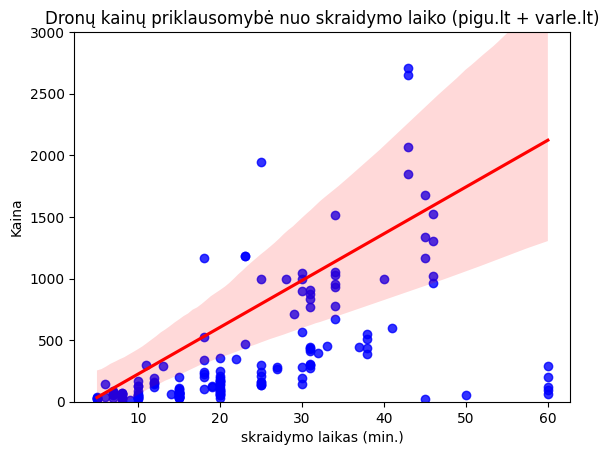

In [100]:
fig, ax = plt.subplots()
sns.regplot(data=dfpv2,x='skraidymo laikas:', y='kaina', order=1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('skraidymo laikas (min.)')
ax.set_ylabel('Kaina')
# ax.set_xlim(30, 55)
ax.set_ylim(0, 3000)
plt.title('Dronų kainų priklausomybė nuo skraidymo laiko (pigu.lt + varle.lt)')
plt.show()

In [102]:
dfp3 = dfp[['kaina', 'veikimo atstumas:']]

dfp3 = dfp3.dropna(subset=['veikimo atstumas:'])
dfp3['veikimo atstumas:']=dfp3['veikimo atstumas:'].apply(lambda x: x.replace(' ','').replace('m', '').replace('-',''))
dfp3['veikimo atstumas:'] = dfp3['veikimo atstumas:'].replace([' ', '-', ''], None)
dfp3 = dfp3.dropna(subset=['veikimo atstumas:'])
dfp3['veikimo atstumas:']=dfp3['veikimo atstumas:'].astype(float)

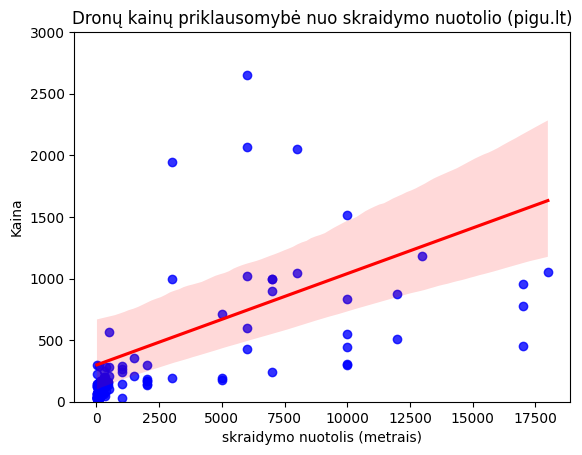

In [107]:
fig, ax = plt.subplots()
sns.regplot(data=dfp3,x='veikimo atstumas:', y='kaina', order=1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('skraidymo nuotolis (metrais)')
ax.set_ylabel('Kaina')
# ax.set_xlim(30, 55)
ax.set_ylim(0, 3000)
plt.title('Dronų kainų priklausomybė nuo skraidymo nuotolio (pigu.lt)')
plt.show()

In [118]:
dfv3 = dfv[['kaina', 'svoris (su baterija, g)']]
dfp3=dfp[['kaina', 'svoris:']]
dfv3.rename(columns={'svoris (su baterija, g)': 'svoris:'}, inplace=True)
dfpv3= pd.concat([dfv3, dfp3], axis=0, ignore_index=True)

dfpv3['svoris:']=dfpv3['svoris:'].apply(lambda x: str(x).replace(' ','').replace('g', '').replace('-',''))
dfpv3['svoris:'] = dfpv3['svoris:'].replace([' ', '-', '','None'], None)
dfpv3 = dfpv3.dropna(subset=['svoris:'])
dfpv3['svoris:'] = pd.to_numeric(dfpv3['svoris:'], errors='coerce')


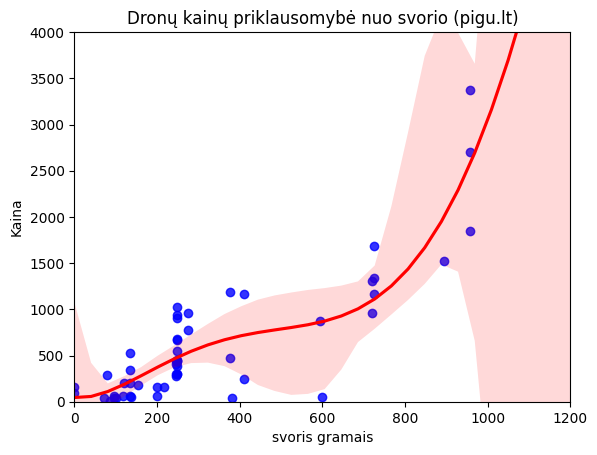

In [129]:
fig, ax = plt.subplots()
sns.regplot(data=dfpv3,x='svoris:', y='kaina', order=6, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('svoris gramais')
ax.set_ylabel('Kaina')
ax.set_xlim(0, 1200)
ax.set_ylim(0, 4000)
plt.title('Dronų kainų priklausomybė nuo svorio (pigu.lt)')
plt.show()

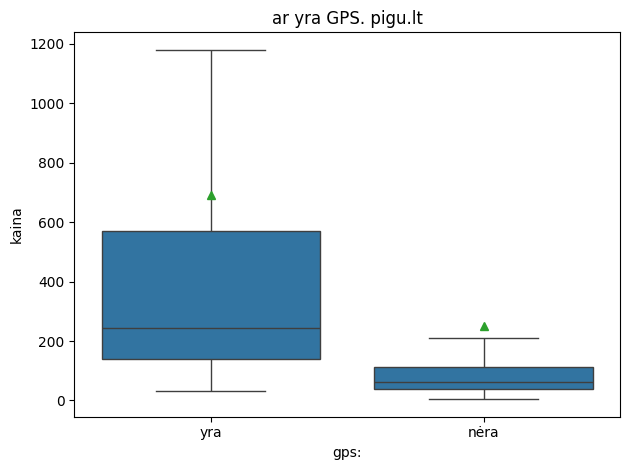

In [154]:
dfp4=dfp[['kaina', 'gps:']]
dfp4['gps:']=dfp4['gps:'].str.replace('nenurodyta', 'nėra')

fig, ax = plt.subplots()
sns.boxplot(data=dfp4, y='kaina', x='gps:', showmeans=True, showfliers=False, ax=ax)
ax.set_title('ar yra GPS. pigu.lt')
fig.tight_layout()
# ax.set_xlim(0, 10000)
plt.show()

In [ ]:
dfv5=dfv[['kaina', 'didžiausias skrydžio laikas', 'perdavimo atstumas (lauke ir be kliūčių)','didžiausias skrydžio laikas', 'svoris (su baterija, g)', 'gps', 'stabilizavimas']]
dfp5=dfp[['kaina', 'skraidymo laikas:', 'veikimo atstumas:', 'skraidymo laikas:', 'svoris:', 'gps:', 'skrydžio stabilizacija:']]



In [ ]:
dfv5['didžiausias skrydžio laikas']

dfp5['skraidymo laikas:']